In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [10]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 500

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\kasmirrrrrr\APPLE_DISEASE_DATASET",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 419 files belonging to 4 classes.


In [12]:
class_names = dataset.class_names
class_names

['APPLE ROT LEAVES', 'HEALTHY LEAVES', 'LEAF BLOTCH', 'SCAB LEAVES']

(32, 256, 256, 3)
[3 1 0 2 3 3 2 0 0 3 0 3 0 0 1 1 3 0 0 2 0 3 3 2 2 3 1 3 2 3 0 3]


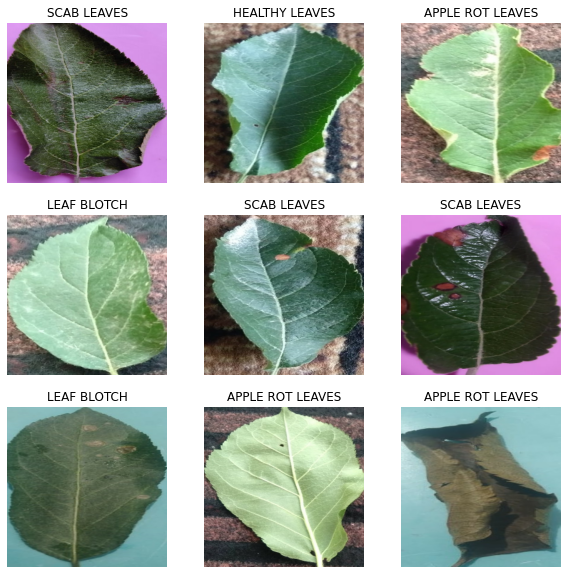

In [13]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [14]:
len(dataset)

14

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.9, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(test_size)
    
    return train_ds, test_ds

In [16]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2)
])

In [20]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape, padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256,  (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/500
12/12 [==============================] - 37s 2s/step - loss: 1.3675 - accuracy: 0.3634
Epoch 2/500
12/12 [==============================] - 30s 2s/step - loss: 1.3214 - accuracy: 0.3859
Epoch 3/500
12/12 [==============================] - 31s 3s/step - loss: 1.3181 - accuracy: 0.4000
Epoch 4/500
12/12 [==============================] - 30s 2s/step - loss: 1.3208 - accuracy: 0.3324
Epoch 5/500
12/12 [==============================] - 29s 2s/step - loss: 1.3032 - accuracy: 0.3690
Epoch 6/500
12/12 [==============================] - 30s 2s/step - loss: 1.2838 - accuracy: 0.3887
Epoch 7/500
12/12 [==============================] - 29s 2s/step - loss: 1.2780 - accuracy: 0.3662
Epoch 8/500
12/12 [==============================] - 30s 2s/step - loss: 1.2538 - accuracy: 0.2873
Epoch 9/500
12/12 [==============================] - 31s 3s/step - loss: 1.2119 - accuracy: 0.3577
Epoch 10/500
12/12 [==============================] - 31s 3s/step - loss: 1.2090 - accuracy: 0.3408
Epoch 11/

In [24]:
scores = model.evaluate(test_ds)

13/13 [==============================] - 9s 573ms/step - loss: 3.1607 - accuracy: 0.4729


In [25]:
scores

[3.160741090774536, 0.4728682041168213]

In [26]:
history.params

{'verbose': 1, 'epochs': 500, 'steps': 12}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [28]:
acc = history.history['accuracy']

loss = history.history['loss']

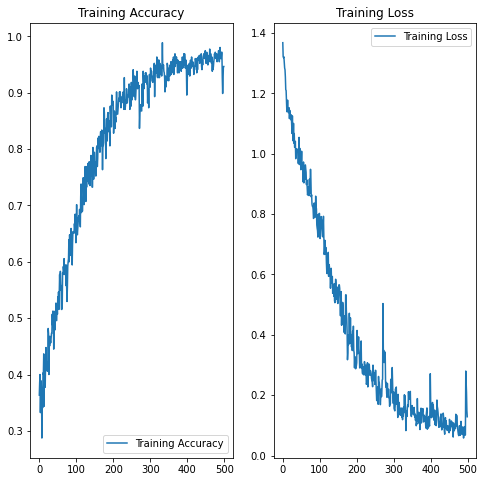

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()